<a href="https://colab.research.google.com/github/dsalvat/art-of-data-driven-business/blob/main/02a_TheArtofDataDrivenBusiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy.stats import ttest_ind
import pandas as pd
dm = pd.read_csv('matzke_et_al.csv')
dm_horizontal = dm[dm.Condition =='Horizontal']
dm_fixation = dm[dm.Condition == 'Fixation']
t, p = ttest_ind(dm_horizontal.CriticalRecall, dm_fixation.CriticalRecall)
print('t= {:.3f}, p = {:.3f}'.format(t,p))

t= -2.845, p = 0.007


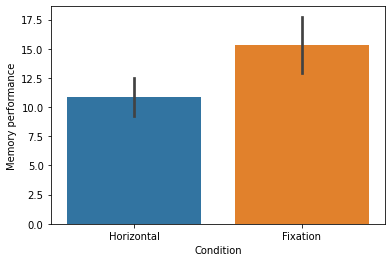

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Condition', y="CriticalRecall", data=dm)
plt.xlabel('Condition')
plt.ylabel('Memory performance')
plt.show()

In [14]:
from scipy.stats import ttest_rel
dm = pd.read_csv('moon-aggression.csv')
t, p = ttest_rel(dm.Moon, dm.Other)
print('t= {:.3f}, p = {:.3f}'.format(t,p))

t= 6.452, p = 0.000


In [23]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols 

dm = pd.read_csv('heartrate.csv')
dm = dm.rename({'Heart Rate': 'HeartRate'}, axis=1)
df = anova_lm(ols('HeartRate ~ Gender * Group', data=dm).fit())
print(df)

                 df      sum_sq        mean_sq           F         PR(>F)
Gender          1.0   45030.005   45030.005000  185.979949   3.287945e-38
Group           1.0  168432.080  168432.080000  695.647040  1.149926e-110
Gender:Group    1.0    1794.005    1794.005000    7.409481   6.629953e-03
Residual      796.0  192729.830     242.122902         NaN            NaN


In [24]:
dm = pd.read_csv('gpa.csv')
model = ols('gpa ~ satm + satv', data=dm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.476
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           0.000722
Time:                        23:51:21   Log-Likelihood:                -254.18
No. Observations:                 224   AIC:                             514.4
Df Residuals:                     221   BIC:                             524.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2887      0.376      3.427      0.0

<AxesSubplot:>

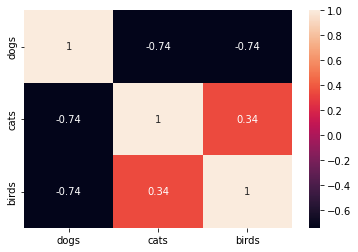

In [26]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    [(.2, .3, .8), (.0,.6,.9),(.6,.0,.4),
     (.2, .1, .9), (.1,.3,.7),(.1,.5,.6), (.7,.1,.5), (.3,.0,.8),],
     columns = ['dogs','cats','birds'])
corr_mat = df.corr()

import seaborn as sn
sn.heatmap(corr_mat, annot=True)

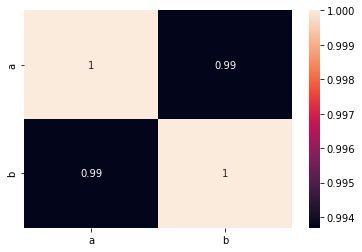

In [27]:
df1=pd.DataFrame( np.random.randn(3,2), columns=['a','b'])
df2=pd.DataFrame( np.random.randn(3,2), columns=['a','b'])

corr_mat = df1.corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

In [28]:
df1.corrwith(df2)

a   -0.737712
b    0.653411
dtype: float64

In [29]:
df1.corrwith(df2.set_axis(df1.columns, axis='columns', inplace=False))

a   -0.737712
b    0.653411
dtype: float64

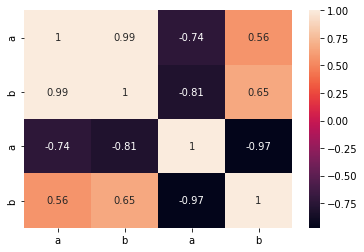

In [30]:
corr_mat = pd.concat([df1, df2], axis=1).corr()
sn.heatmap(corr_mat, annot=True)
plt.show()